# The Deutsch-Josza Algorithm

This notebook shows the implementation for the Deustch-Josza Algorithm for a n=3 qubits. We begin by establishing two functions, a constant function, and balanced function.

In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
import matplotlib
%matplotlib inline

## Establishing functions $f(q_1,q_2,q_3)$ constant, $g(q_1,q_2,q_3)$ balanced.

### Constant function ($f$)
There are only two possible constant functions to choose from, $f(q_1,q_2,q_3)=0$, $f(q_1,q_2,q_3)=1$. We choose the latter.

In [3]:
Uf= QuantumCircuit(4)

In [4]:
Uf.x(3)

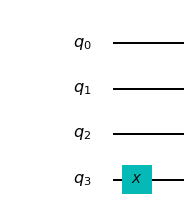

In [5]:
Uf.draw(output = "mpl")

### Balanced function (g)
We take the following balanced function, which appears to be the most simple among many others possible. $g(q_1,q_2,q_3)=0$ whenever $q_1=0$, $g(q_1,q_2,q_3)=1$ whenever $q_1=0$. It is easy to see that this is a balanced function since there are four possible states with $|0XX\rangle$ and another four with states $|1XX\rangle$.

In [6]:
Ug= QuantumCircuit(4)
Ug.cx(0,3)


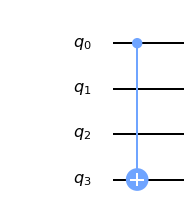

In [7]:
Ug.draw(output = "mpl")

In [9]:
# We define the functions we´re testing as python functions, this way we can apply all the gates
# with one command.
def uf(circuit):
    circuit.x(3)
    
def ug(circuit):
    circuit.cx(0,3)

## Proceeding to the algorithm
We begin by declaring the dimension of space where $f,g$ take values, in this particular case, n=3.
First we show the workings of the algorithm with the constant function $f$. This is supposedly unknown, however we expect to see all measurements of the first 3 qubits to result in $|0\rangle$, which is $|000\rangle$.

In [10]:
n=3
qc=QuantumCircuit(n+1,n)

In [11]:
qc.x(3)
for i in range (0,n):
    qc.h(i)
qc.h(3)
qc.barrier()

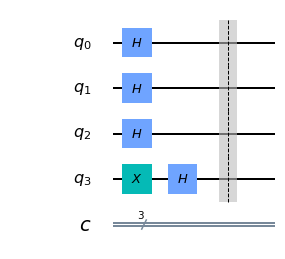

In [12]:
qc.draw(output="mpl")

Thus far, we have created the superposition with all of the existing qubits, prior to applying our constant function.

In [13]:
uf(qc)
qc.barrier()

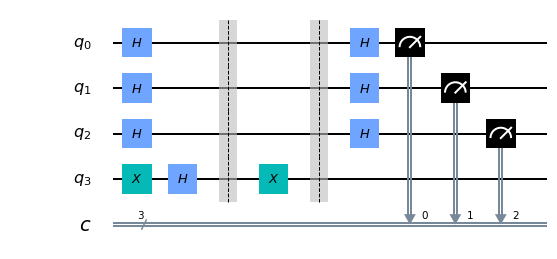

In [14]:
# This is just other syntax for " for i in range(0,n):"
qc.h(range(0,n))
qc.measure(range(0,n),range(0,n))

qc.draw(output="mpl")

### Simulating and showing measurement results for constant function f:
We expect to measure all shots on $|000\rangle$.

In [15]:
qasm = Aer.get_backend('qasm_simulator')
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

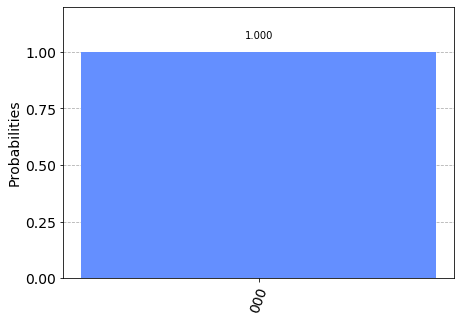

In [16]:
plot_histogram(counts)

Just as expected, there is a 100% probability of reading final state $|000\rangle$, confirms that $f$ is a constant function

## The algorithm for g, a balanced function.
Now we draw the same algorithm, replacing "uf(qc)" with "ug(qc)", this way we have the function $g$ in our circuit.

In [17]:
qc2=QuantumCircuit(n+1,n)


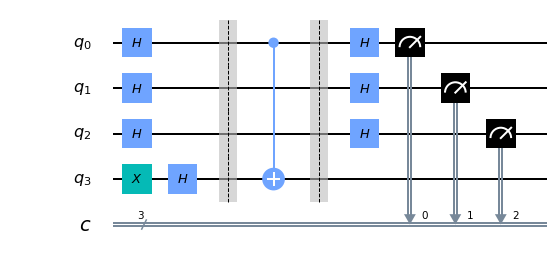

In [18]:
qc2.x(3)
for i in range (0,n):
    qc2.h(i)
qc2.h(3)
qc2.barrier()
ug(qc2)
qc2.barrier()
qc2.h(range(0,n))
qc2.measure(range(0,n),range(0,n))

qc2.draw(output="mpl")

### Simulating and showing results for balanced function g:
This time we expect to measure any state **except** for state $|000\rangle$. We may measure any other state with any given probability.

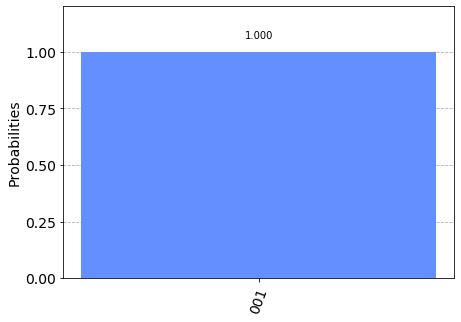

In [19]:
job = execute(qc2, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc2)
plot_histogram(counts)

This shows that $g$ is indeed a balanced function, since there were no measurements corresponding to state $|000\rangle$.